4.833333333333343
[51.5282271  97.53735628]
303.65


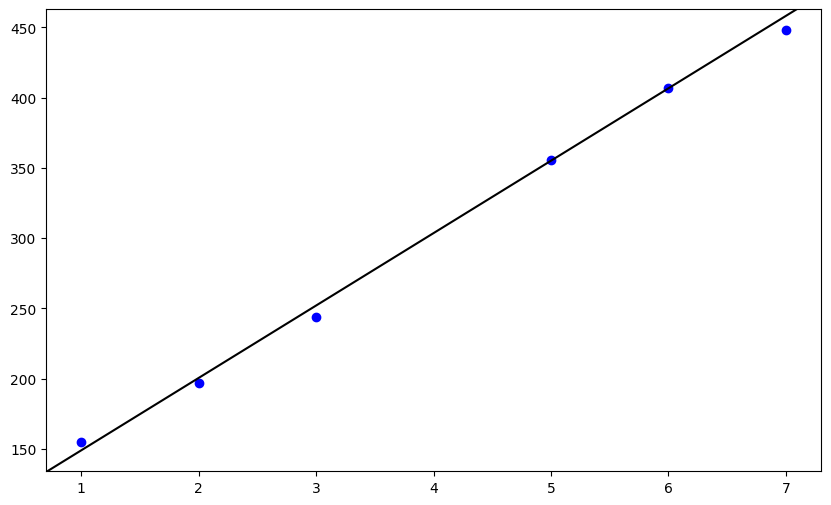

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([(1, 155), (2, 197), (3, 244), (5, 356), (6, 407), (7, 448)])

plt.figure(figsize = (10, 6))
plt.scatter(data_x[:,0], data_x[:,1], color = "b")

np.random.seed(0)
w = np.array(np.zeros(2))
eta = np.array([0.01, 0.01])
model = lambda x, w: w[0] * x + w[1]

for i in range(10000):
    x = data_x[np.random.randint(0, 5)]
    dp = x[1] - model(x[0], w)
    w += eta * np.array([x[0], 1]) * dp

plt.axline((5, model(5, w)), (1, model(1, w)), color = "black")

print(np.mean(np.abs(data_x[:,1] - model(data_x[:,0], w))))
print(w)
print(round(model(4, w), 2))

4.833333333333343
[51.5282271  97.53735628]
355.18


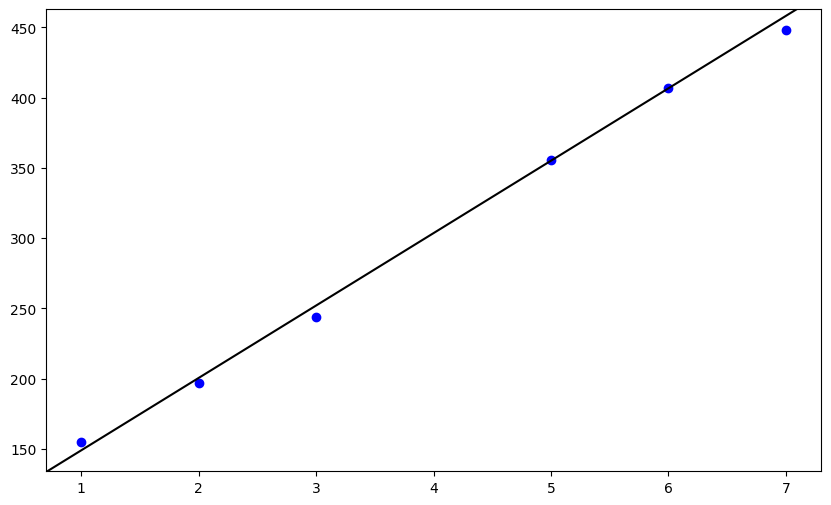

In [18]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([(1, 155), (2, 197), (3, 244), (5, 356), (6, 407), (7, 448)])

plt.figure(figsize = (10, 6))
plt.scatter(data_x[:,0], data_x[:,1], color = "b")

np.random.seed(0)
w = np.array(np.zeros(2))
eta = np.array([0.01, 0.01])
model = lambda x, w: w[0] * x + w[1]

for i in range(10000):
    x = data_x[np.random.randint(0, 5)]
    dp = x[1] - model(x[0], w)
    w += eta * np.array([x[0], 1]) * dp
    Q = np.mean(np.abs(data_x[:,1] - model(data_x[:,0], w)))
    
plt.axline((5, model(5, w)), (1, model(1, w)), color = "black")

print(np.mean(np.abs(data_x[:,1] - model(data_x[:,0], w))))
print(w)
print(round(model(5, w), 2))

4.833333333333343
[51.5282271  97.53735628]
355.18


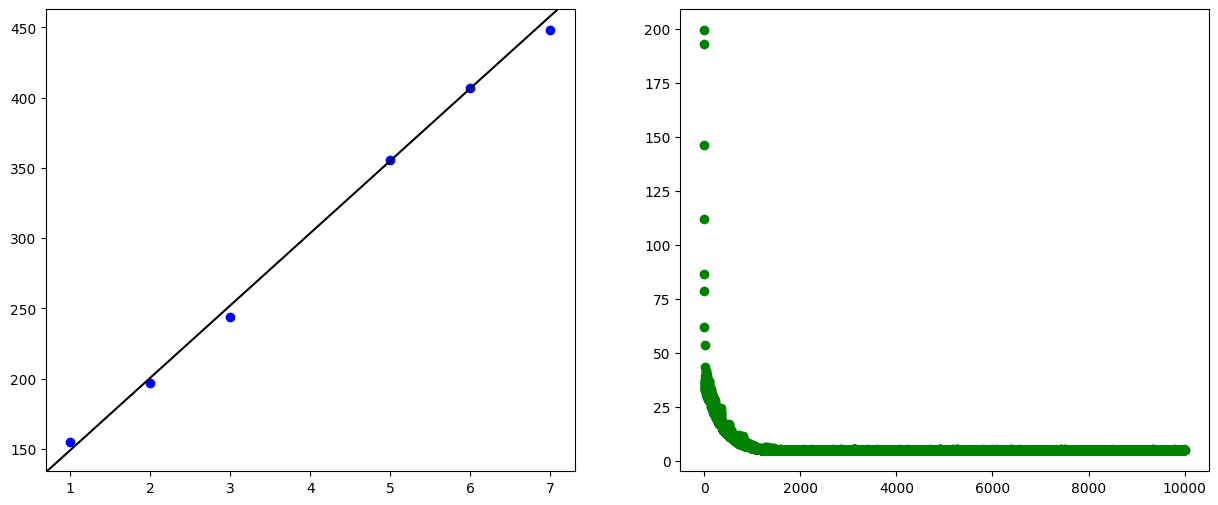

In [214]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([(1, 155), (2, 197), (3, 244), (5, 356), (6, 407), (7, 448)])

f, axs = plt.subplots(1, 2, figsize = (15, 6))
a = axs[0]
b = axs[1]
a.scatter(data_x[:,0], data_x[:,1], color = "b")

np.random.seed(0)
w = np.array(np.zeros(2))
eta = np.array([0.01, 0.01])
model = lambda x, w: w[0] * x + w[1]
Q = []

for i in range(10000):
    x = data_x[np.random.randint(0, 5)]
    dp = x[1] - model(x[0], w)
    w += eta * np.array([x[0], 1]) * dp
    Q += [np.mean(np.abs(data_x[:,1] - model(data_x[:,0], w)))]
    
a.axline((5, model(5, w)), (1, model(1, w)), color = "black")
b.scatter(np.array([i for i in range(10000)]), np.array(Q), c = "g")

print(np.mean(np.abs(data_x[:,1] - model(data_x[:,0], w))))
print(w)
print(round(model(5, w), 2))

[-987318.74978863    6824.32842827]
2904855.791726885


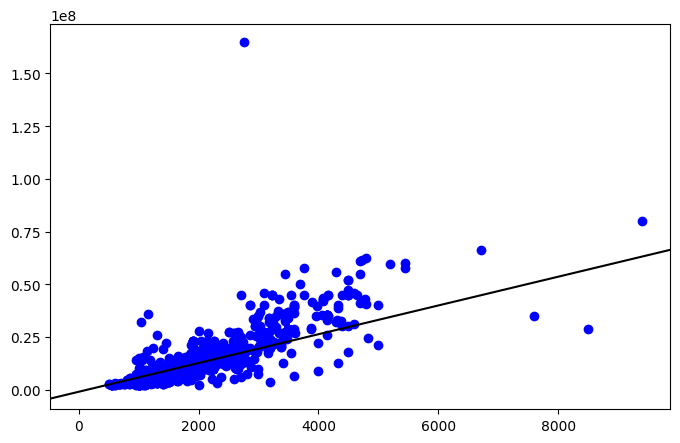

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

board = pd.read_csv("Hyderabad.csv")
price = np.array(board["Price"])
area = np.array(board["Area"])
w = np.array(np.zeros(2))
eta = np.array([0.0001, 0.0000001])
size = len(area)

model = lambda w, x: w @ np.array([1, x])

for i in range(10000):
    n = np.random.randint(0, size - 1)
    dp = price[n] - model(w, area[n])
    w += eta * np.array([1, area[n]]) * dp

great = np.array([model(w, area[i]) for i in range(size)])
print(w)
print(np.mean(np.abs(price - great)))
    
plt.figure(figsize = (8, 5))
plt.scatter(area, price, color = "b")
plt.axline((5, model(w, 5)), (1, model(w, 1)), color = "black")

plt.show()

In [188]:
# упражнение 3.3
import numpy as np

model = lambda s: 2 * s + 50
s = np.array([100, 200, 200, 250, 325])
p = np.array([200, 475, 400, 520, 735])
results = np.array(model(s))
print(results)
print(np.mean(np.abs(p - results))) # среднее абсолютное отклонение
print(np.sqrt(np.mean((p - results) ** 2)) # среднее квадратичное отклонение

[250 450 450 550 700]
38.0
39.370039370059054


In [207]:
import numpy as np

model = lambda w, x: w @ np.array([1, x]) 
w = np.array([3., 2.])
eta = np.array([0.01, 0.01])
point = (5., 15.)

# квадратичный подход
for i in range(100):
    dp = point[1] - model(w, point[0])
    w += eta * np.array([1, point[0]]) * dp

# абсолютный подход
#for i in range(100):
#    result = model(w, point[0])
#    dp = point[1] - model(w, point[0])
#    if result > point[1]:
#       w -= eta * np.array([1, point[0]]) * dp
#    else :
#        w += eta * np.array([1, point[0]]) * dp

print(w, model(w, point[0]))

[3.07692308 2.38461538] 14.999999999999831


2.9000000000000004 6.3


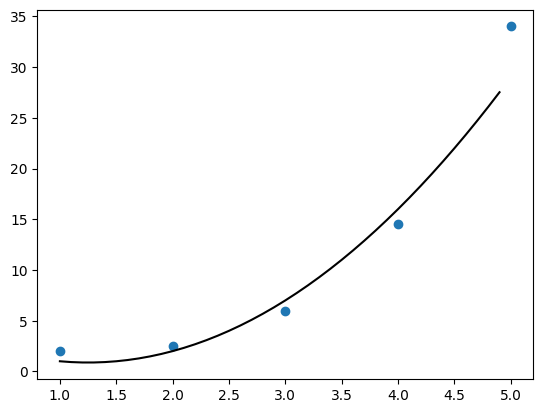

In [238]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.array([1, 2, 3, 4, 5])
data_y = np.array([2.0, 2.5, 6.0, 14.5, 34.0])
w = np.array([4, -5, 2])
model = lambda w, x: w[0] + x * w[1] + x**2 * w[2]
lam = 0.1

Q = np.mean(np.abs(data_y - model(w, data_x)))
L1 = np.sum(np.abs(w))
L2 = np.sum(w**2)
print(Q + lam * L1, Q + lam * L2)

plt.plot(np.arange(1.0, 5.0, 0.1), model(w, np.arange(1.0, 5.0, 0.1)), color = 'black')
plt.scatter(data_x, data_y)

In [64]:
import numpy as np

def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2

def model(w, x):
    return w @ np.array([1, x, x**2, x**3, x**4])

def l1(w):
    return np.sum(np.abs(w))

def l2(w):
    return np.sum(w * w)

def Q(w, x, y):
    t1 = sum((y[i] - model(w, x[i]))**2 for i in range(len(x)))
    return np.sqrt(t1)

coord_x = np.arange(-3.0, 3.0, 0.1) 
coord_y = func(coord_x) 
eta = np.array([0.01, 0.001, 0.0001, 0.00001, 0.000001])
w = np.zeros(5)

print(Q(w, coord_x, coord_y) + l1(w))
print(Q(w, coord_x, coord_y) + l2(w))
for i in range(1000):
    x = coord_x[np.random.randint(0, len(coord_x))]
    dp = func(x) - model(w, x)
    w += eta * np.array([1, x, x**2, x**3, x**4]) * dp
print(Q(w, coord_x, coord_y) + l1(w))
print(Q(w, coord_x, coord_y) + l2(w))
print(w)

11.89762422622936
11.89762422622936
5.627290687001091
6.167301750090083
[-1.53991246 -0.15353844  0.15865473 -0.01364699  0.01471484]


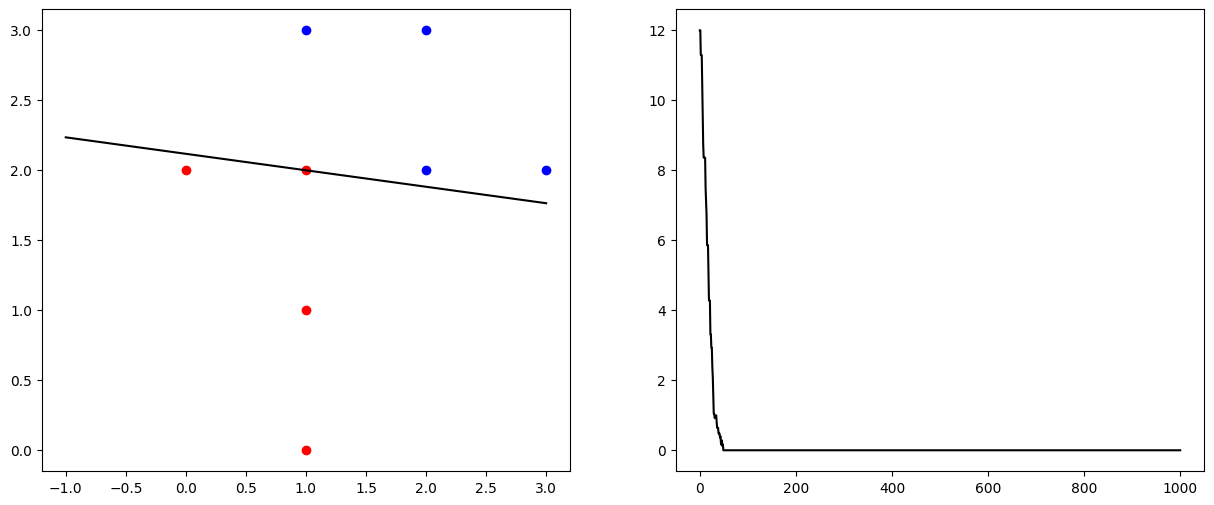

<Figure size 1000x600 with 0 Axes>

In [191]:
import numpy as np
import matplotlib.pyplot as plt

def step(w, x):
    if w @ np.array([1, x[0], x[1]]) >= 0:
        return 1
    return 0

data_x = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
data_y = np.array([0,0,0,0,1,1,1,1])
w = np.ones(3)
batch_size = 3
size = 8
eta = np.array([0.04, 0.04, 0.01])
model = lambda w, x: w @ np.array([1, x[0], x[1]])
Qc = np.array([])
Qc = np.append(Qc, sum(abs(model(w, data_x[i])) for i in range(size) if step(w, data_x[i]) != data_y[i]))

for i in range(1000):
    indx = np.random.randint(0, size - batch_size + 1)
    x = data_x[indx : indx + batch_size]
    y = data_y[indx : indx + batch_size]
    for j in range(batch_size):
        dp = 0
        if y[j] != step(w, x[j]):
            dp = y[j] - step(w, x[j])
        w += eta * np.array([1, x[j][0], x[j][1]]) * dp
    Qc = np.append(Qc, sum(abs(model(w, data_x[i])) for i in range(size) if step(w, data_x[i]) != data_y[i]))


f, axs = plt.subplots(1, 2, figsize = (15, 6))
a = axs[0]
b = axs[1]

plt.figure(figsize = (10, 6))
a.scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], color = "red")
a.scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], color = "blue")
a.plot((-1, 3), (-(w[0] + w[1] * -1) / w[2], -(w[0] + w[1] * 3) / w[2]), color = "black")

b.plot(range(0, 1001, 1), Qc, color = "black")

In [245]:
import numpy as np

w = np.array([-4, 2, 3]) 
p_x = (1, 1, 1)
p_y = 0

def step(w, x):
    if w @ x >= 0:
        return 1
    return 0

model = lambda w, x: w @ x
    
#a
print(p_y - step(w, p_x))

#b
print(abs(model(w, p_x)))

#c
w = np.array([-4.01, 1.99, 2.99])
print(abs(model(w, p_x)))

#d
w = np.array([-3.01, 2, 2])
print(p_y - step(w, p_x))
print(abs(model(w, p_x)))               

-1
1
0.9700000000000006
-1
0.9900000000000002


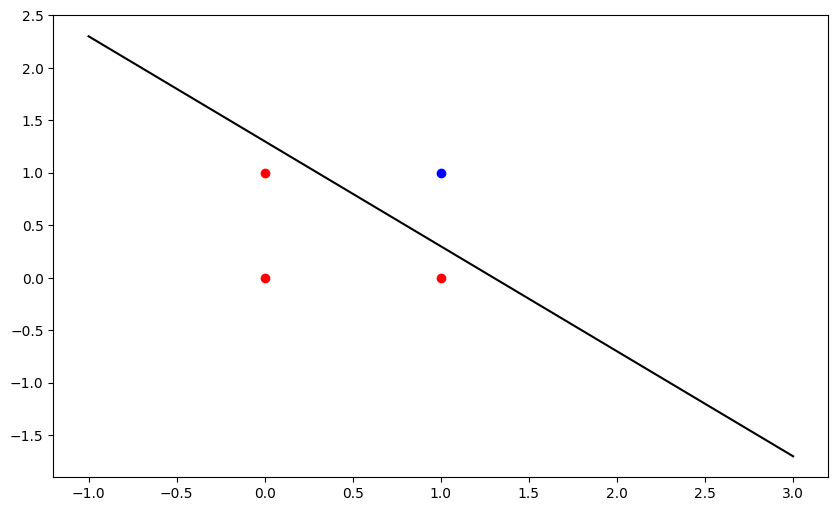

In [255]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([-1.3, 1, 1])

plt.figure(figsize = (10, 6))
plt.scatter([0, 0, 1], [0, 1, 0], color = "red")
plt.scatter([1], [1], color = "blue")
plt.plot((-1, 3), (-(w[0] + w[1] * -1) / w[2], -(w[0] + w[1] * 3) / w[2]), color = "black")

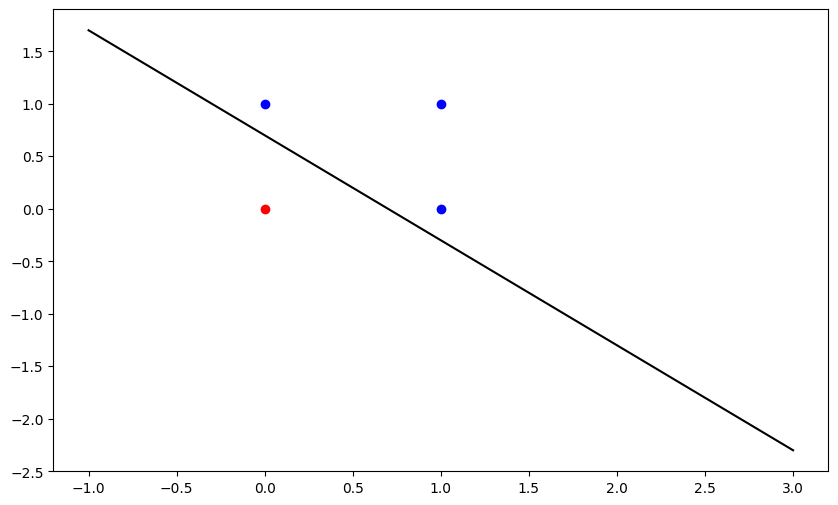

In [257]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([-0.7, 1, 1])

plt.figure(figsize = (10, 6))
plt.scatter([0], [0], color = "red")
plt.scatter([0, 1, 1], [1, 0, 1], color = "blue")
plt.plot((-1, 3), (-(w[0] + w[1] * -1) / w[2], -(w[0] + w[1] * 3) / w[2]), color = "black")

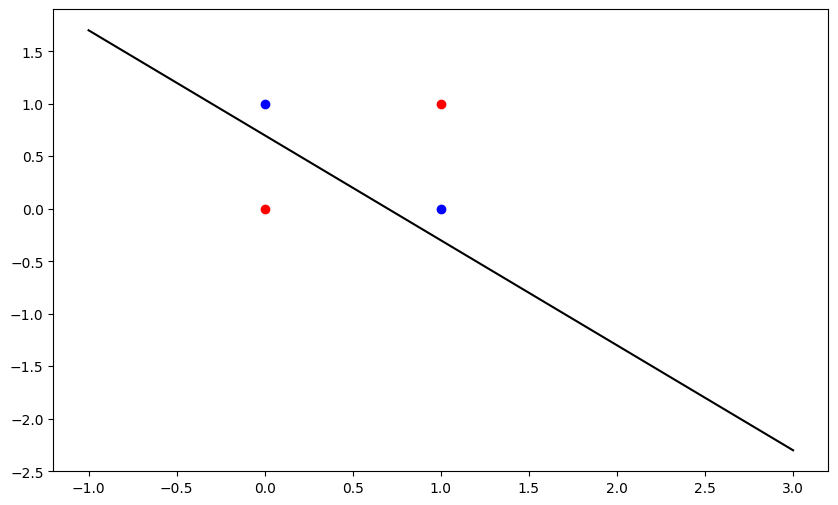

In [259]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([-0.7, 1, 1])

plt.figure(figsize = (10, 6))
plt.scatter([0, 1], [0, 1], color = "red")
plt.scatter([0, 1], [1, 0], color = "blue")
plt.plot((-1, 3), (-(w[0] + w[1] * -1) / w[2], -(w[0] + w[1] * 3) / w[2]), color = "black")

[np.float64(0.9978190000678953), np.float64(0.9848870157316121), np.float64(0.9715166221609928), np.float64(0.7177416601145474)]
[np.float64(0.8406354564668376), np.float64(0.9097346068382566), np.float64(0.9926570860850313), np.float64(0.9961433202311328)]
[-9.36947416  3.24368572  2.59625075]
0.6573878930007556


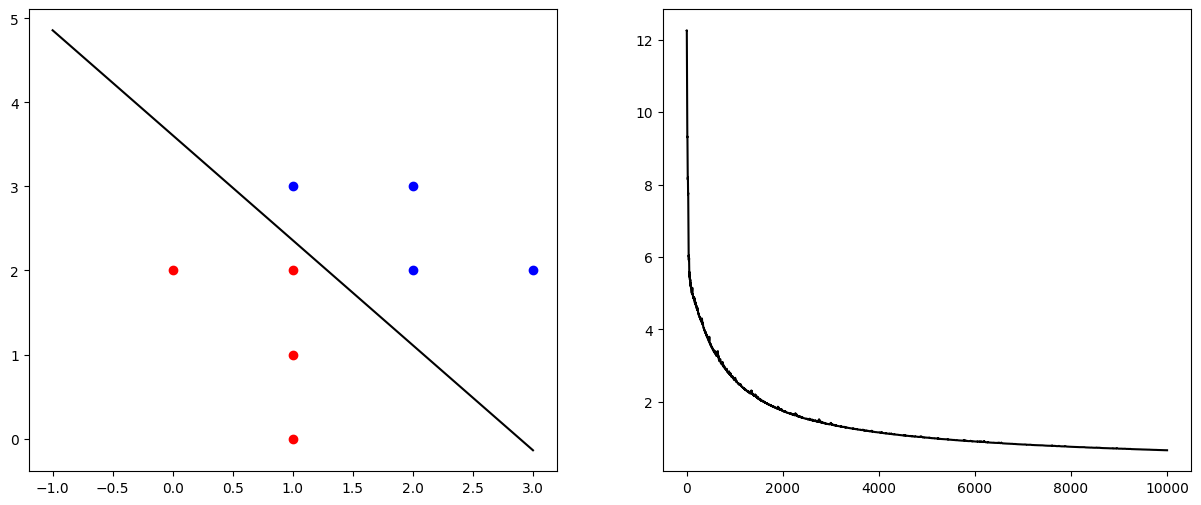

In [365]:
import numpy as np
import matplotlib.pyplot as plt

def model(w, x):
    return w @ np.array([1, x[0], x[1]])

def sigm(x):
    return np.exp(x) / (np.e**(x) + 1)

def Q(x, y):
    error = 0
    for i in range(len(x)):
        s = sigm(model(w, x[i]))
        error += -y[i] * np.log(s) - (1 - y[i]) * np.log(1 - s)
    return error

data_x = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
data_y = np.array([0,0,0,0,1,1,1,1])
size = 8
batch_size = 3
w = np.ones(3)
eta = 0.01
Qtable = np.array([Q(data_x, data_y)])

f, axs = plt.subplots(1, 2, figsize = (15, 6))
axs[0].scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], color = "red")
axs[0].scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], color = "blue")

for i in range(10000):
    ind = np.random.randint(0, size - batch_size + 1)
    x = data_x[ind : ind + batch_size]
    y = data_y[ind : ind + batch_size]
    for j in range(batch_size):
        dp = y[j] - sigm(model(w, x[j]))
        w += eta * np.array([1, x[j][0], x[j][1]]) * dp
    Qtable = np.append(Qtable, Q(data_x, data_y))

#w = np.array([-0.68, 0.47, 0.1])

axs[0].plot((-1, 3), (-(w[0] + w[1] * -1) / w[2], -(w[0] + w[1] * 3) / w[2]), color = "black")
axs[1].plot(range(0, 10001), Qtable, color = "black")

print([1 - sigm(model(w, data_x[i])) for i in range(size // 2)])
print([sigm(model(w, data_x[i])) for i in range(size // 2, size)])
print(w)
print(Q(data_x, data_y))

In [10]:
import numpy as np
def sigm(w, x):
    model = w @ np.array([1, x[0], x[1]])
    return np.exp(model) / (1 + np.exp(model))

In [11]:
sigm(np.array([-0.8, 1, 0.5]), np.array([1, 1, 1]))

np.float64(0.6681877721681662)

In [27]:
w = np.array([-4, 2, 3], dtype = "float64")
x = np.array([1.0, 1.0, 1.0])
y = 0
s = sigm(w, x)

print(1 - sigm(w, x))

print(-y * np.log(s) - (1 - y) * np.log(1 - s))

eta = 0.01
for i in range(100):
    dp = y - s
    w += eta * dp * x
print(w)
print(1 - sigm(w, x))
s = sigm(w, x)
print(-y * np.log(s) - (1 - y) * np.log(1 - s))

0.2689414213699951
1.3132616875182228
[-4.73105858  1.26894142  2.26894142]
0.7673085608637795
0.26486626273345487


In [43]:
w = np.array([-4, 2, 3], dtype = "float64")
x = np.array([-5, 4.2, 5])
y = 0
s = sigm(w, x)

print(1 - sigm(w, x))
print(-y * np.log(s) - (1 - y) * np.log(1 - s))

0.8021838885585815
0.22041740991845127


In [241]:
#наивный байесовский классификатор

import pandas as pd

emails = pd.read_csv('emails.csv')

def process(email):
    return list(set(email.lower().split()))

#apriority probability
print("apriority probability: ", sum(emails["spam"])/len(emails))

model = dict()
for text, spam in zip(emails["text"], emails["spam"]):
    x = process(text)
    for j in x:
        if j in model:
            if spam == 1:
                model[j]["spam"] += 1
            else:
                model[j]["ham"] += 1
        else:
            if spam == 1:
                model.update({j: {"spam": 2, "ham": 1}})
            else:
                model.update({j: {"spam": 1, "ham": 2}})

def predict(email):
    email = process(email)
    total = len(emails)
    total_spam = sum(emails["spam"])
    total_ham = total - total_spam
    spam = total_spam / total
    ham = total_ham / total
    for i in email:
        if i in model:
            spam *= model[i]["spam"] / total_spam
            ham *= model[i]["ham"] / total_ham
    return  spam / (ham + spam)

print(f"Вероятность спама письма, равна {predict(input())}")

apriority probability:  0.2388268156424581


 moustache


Вероятность спама письма, равна 0.2388268156424581


In [242]:
#наивный байес упражнение 8.3

import pandas as pd
import numpy as np

data_x = np.array([[0, 1, 1, 1],
                   [1, 1, 0, 1],
                   [1, 0, 1, 1],
                   [1, 1, 1, 0],
                   [1, 0, 0, 1],
                   [0, 1, 1, 0],
                   [0, 1, 0, 0],
                   [0, 0, 0, 1]])
data_y = np.array([1, 1, 1, 1, 0, 0, 0, 0])
columns = ["C", "F", "B", "T"]
table = pd.DataFrame(data_x, columns = columns, index = range(1, 9))

total = len(data_x)
total_sick = np.sum(data_y)
total_healthy = total - total_sick

# 0 - healthy, 1 - sick
model = {"C": [0, 0], "F": [0, 0],
         "B": [0, 0], "T": [0, 0]}

for key in table:
    model[key][1] = sum(table[key])
    model[key][0] = total - model[key][1]

def predict(x):
    sick = total_sick / total
    healthy = total_healthy / total
    for key in model:
        if x[key]:
            sick *= model[key][1] / total_sick
            healthy *= model[key][0] / total_healthy
    return sick / (sick + healthy)

x = {"C": 1, "F": 1, "B": 1, "T": 1}
print(predict(x))

0.7352941176470589


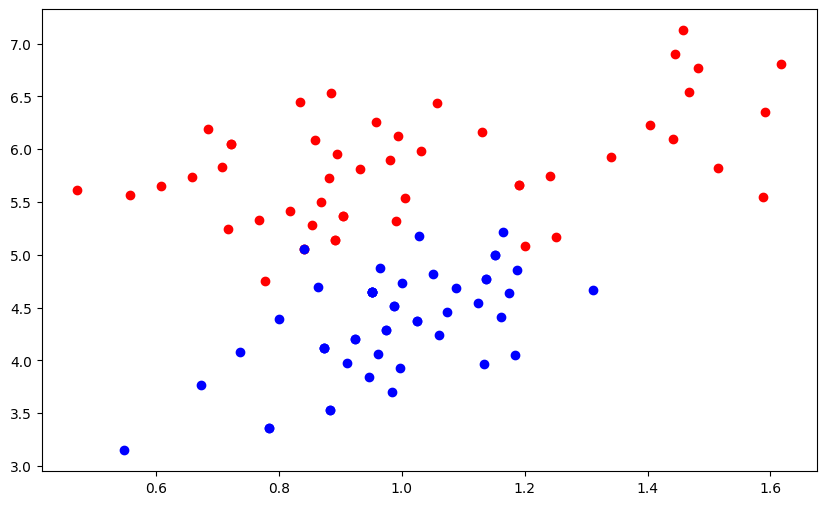

In [297]:
import numpy as np
import matplotlib.pyplot as plt
        
data_x = np.array([(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)])
data_y = np.array([1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1])

def rotate(a):
    matrix = np.array([[np.cos(a), -np.sin(a)],
                       [np.sin(a), np.cos(a)]])
    for i in range(len(data_x)):
        data_x[i] = np.array(data_x[i]) @ matrix 

a = np.pi * -(1/3)
rotate(a)
data_xc1=np.array(data_x[data_y > 0])
data_xc2=np.array(data_x[data_y < 0])
plt.figure(figsize=(10, 6))
plt.scatter(data_xc1[:,0], data_xc1[:,1], c="r")
plt.scatter(data_xc2[:,0], data_xc2[:,1], c="b")    
plt.show()

In [358]:
import numpy as np
from math import log2

data = {15: "c",
        25: "a",
        32: "k",
        35: "a",
        12: "c",
        14: "c"}
size = 6
apps = ["c", "a", "k"]

data1 = []
data2 = []

def func(age):
    global data1, data2
    for key in data:
        if key < age:
            data1 += data[key]
        else:
            data2 += data[key]
    

def entropy():
    entropy1 = 0
    entropy2 = 0
    if len(data1) != 0:
        apps = list(set(data1))
        for app in apps:
            p = data1.count(app) / len(data1)
            entropy1 -= p * log2(p)
    if len(data2) != 0:
        apps = list(set(data2))
        for app in apps:
            p = data2.count(app) / len(data2)
            entropy2 -= p * log2(p)
    return len(data1) / size * entropy1 + len(data2) / size * entropy2

def primes():
    p1 = 1
    p2 = 1
    len1 = len(data1)
    len2 = len(data2)
    if len1 != 0:
        apps = list(set(data1))
        for app in apps:
            p1 -= (data1.count(app) / len1)**2
    if len2 != 0:
        apps = list(set(data2))
        for app in apps:
            p2 -= (data2.count(app) / len2)**2
    return len1 / size * p1 + len2 / size * p2

def real():
    p1 = 0
    p2 = 0
    if len(data1) != 0:
        apps = list(set(data1))
        for app in apps:
            p1 = max(p1, data1.count(app))
    if len(data2) != 0:
        apps = list(set(data2))
        for app in apps:
            p2 = max(p2, data2.count(app))
    return (p1 + p2) / size

func(100)
print(real(), primes(), entropy())

0.5 0.6111111111111112 1.4591479170272446


In [1]:
import pandas as pd
import numpy as np
from math import log2

data_x1 = pd.read_csv("Admission_Predict.csv")
data_y = data_x1["Chance of Admit"].to_list()
data_y = np.array([int(y >= 0.75) for y in data_y])
data_x = []
met = {0: "GRE Score",
       1: "TOEFL Score",
       2: "SOP"}
for i in range(len(data_x1)):
    data_x += [[data_x1[met[0]][i], data_x1[met[1]][i], data_x1[met[2]][i], data_y[i]]]

data_x = np.array(data_x)
alldata1 = [data_x]
label1 = [[0, 0, 0]]
alldata2 = []
label2 = []

def s(data, start, stop, step, label):
    size = len(data)
    data1 = []
    data2 = []
    ent = 100000
    index = 1000
    for i in range(start, stop, step):
        data_1 = []
        data_2 = []
        entr = 0
        entropy1 = 0
        entropy2 = 0
        for j in range(len(data)):
            if data[j][label] < i:
                data_1 += [data[j]]
            else:
                data_2 += [data[j]]
        if len(data_1) != 0:
            for app in range(0, 2):
                p = sum(1 for k in range(len(data_1)) if data_1[k][3] == app) / len(data_1)
                if p:
                    entropy1 -= p * log2(p)
                else:
                    entropy1 -= 0
        if len(data_2) != 0:
            for app in range(0, 2):
                p = sum(1 for k in range(len(data_2)) if data_2[k][3] == app) / len(data_2)
                if p:
                    entropy2 -= p * log2(p)
                else:
                    entropy2 -= 0
        entr = len(data_1) / size * entropy1 + len(data_2) / size * entropy2
        if entr <= ent:
            data1 = data_1
            data2 = data_2
            ent = entr
            index = i
    return [ent, index, label, data1, data2]
            
def entropy(data, label):
    clas = []
    for i in range(3):
        if label[i] == 0:
            if i == 0:
                clas += [s(data, 290, 340, 1, 0)]
            elif i == 1:
                clas += [s(data, 92, 120, 1, 1)]
            elif i == 2:
                clas += [s(data, 1, 6, 1, 2)]
    return min(clas)

quastion = []
for i in range(3):
    quastion1 = []
    for j in range(len(alldata1)):
        v = entropy(alldata1[j], label1[j])
        alldata2 += [v[3], v[4]]
        l1 = label1[j]
        l1[v[2]] = 1
        label2 += [l1.copy(), l1.copy()]
        quastion1 += [[v[2], v[1]]]
    quastion += [quastion1]
    alldata1 = alldata2.copy()
    label1 = label2.copy()
    alldata2 = []
    label2 = []
    
def predict(x):
    p = [0, 0]
    for i in range(3):
        if x[quastion[p[0]][p[1]][0]] < quastion[p[0]][p[1]][1]:
            p[1] = p[1] * 2
        else:
            p[1] = p[1] * 2 + 1
        p[0] += 1
    count = sum(1 for i in range(len(alldata1[p[1]])) if alldata1[p[1]][i][3] == 1)
    count = count / len(alldata1[p[1]])
    if count > 0.5:
        return 1
    return 0

count = 0
total = len(data_x)
for i in data_x:
    if predict(i) == i[3]:
        count += 1
print(count / total)

0.865


In [99]:
import numpy as np

size = 6
data_x = np.array([[100, -1, 1],   [100, 1, -1],
                   [10000, 1, -1], [10000, -1, 1],
                   [5000, 1, 1],   [100, 1, -1]])

def entropy(data_x, index, column):
    data_1 = data_x[data_x[:, column] >= index]
    data_2 = data_x[data_x[:, column] < index]
    l = len(data_1)
    p1 = np.sum(data_1[:, 2] == 1) / (l + 1e-10) + 1e-10
    p2 = np.sum(data_2[:, 2] == -1) / (size - l + 1e-10) + 1e-10
    return - p1 * np.log2(p1) * (l / size) - p2 * np.log2(p2) * ((size - l) / size)

def ent_post(data_x):
    index = 100000
    count = 100000
    for i in range(-1, 2):
        if entropy(data_x, i, 1) < count:
            index = i
            count = entropy(data_x, i, 1)
    return index

def ent_price(data_x):
    index = 100000
    count = 100000
    for i in range(0, np.max(data_x) + 100, 100):
        if entropy(data_x, i, 0) < count:
            index = i
            count = entropy(data_x, i, 0)
    return index

print(entropy(data_x, 200, 0), entropy(data_x, 0, 1))

0.3899750004140583 0.3333333344754742


In [161]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tensorflow.keras as kr

f = lambda x: int(x[1]>x[0])
def g(Z):
    return np.array([f(i) for i in Z])

data = pd.read_csv("one_circle.csv")
data_y = np.array(kr.utils.to_categorical(data["y"], 2))
data_x = np.array(data[["x_1", "x_2"]])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input

model = Sequential()
model.add(Input((2,)))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(2, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

model.fit(x = data_x, y = data_y, batch_size = 10, epochs = 100)

plot_model(data_x, data_y, model)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,770 (34.26 KB)

 Trainable params: 8,770 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6345 - loss: 0.6595
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7640 - loss: 0.4958 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8051 - loss: 0.4243 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7658 - loss: 0.4609 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7819 - loss: 0.4733 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7371 - loss: 0.4805  
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7655 - loss: 0.4224 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7585 - loss: 0.4627 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7355 - loss: 0.4668 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7489 - loss: 0.4393 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7761 - loss: 0.4134 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

NameError: name 'pyplot' is not defined

In [296]:
def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = g(Z).reshape(xx.shape)
    print(Z)
    data1 = X[np.argwhere(y == np.array([0, 1]))[::2,0]]
    data2 = X[np.argwhere(y == np.array([1, 0]))[::2,0]]
    plt.scatter(data1[:,0], data1[:,1], marker = "^", c = "red");
    plt.scatter(data2[:,0], data2[:,1], marker = "s", c = "blue");
    plt.contour(xx, yy, Z, colors = 'k',linewidths = 2)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

plot_model(data_x, data_y, model)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 60000) + inhomogeneous part.

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data()
x_train_r = x_train.reshape(-1, 28*28)
x_test_r = x_test.reshape(-1, 28*28)
y_train_r = to_categorical(y_train, 10)
y_test_r = to_categorical(y_test, 10)

model = Sequential()
model.add(Input((28**2, )))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

model.fit(x_train_r, y_train_r, batch_size = 10, epochs = 10)

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.4266 - loss: 5.2704
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7661 - loss: 0.8361
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8445 - loss: 0.5912
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8783 - loss: 0.4797
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8948 - loss: 0.4246
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9052 - loss: 0.3790
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9098 - loss: 0.3788
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9105 - loss: 0.3583
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9163 - loss: 0.3438
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9175 - loss: 0.3392


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
5
0.9477


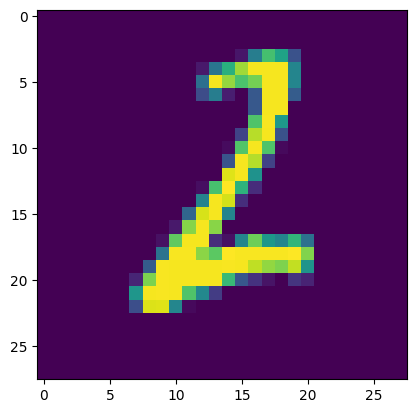

In [295]:
pred_v1 = model.predict(x_test_r)
pred_v2 = [np.argmax(pred) for pred in pred_v1]
result = np.array([pred_v2 == y_test])
unr = x_test[result[0,:] == False]
ind = 23
plt.imshow(unr[ind])
print(y_test[ind])
print(np.sum(result) / result.shape[1])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.utils import to_categorical

np.random.seed(1)
tf.random.set_seed(1)
data = pd.read_csv("Hyderabad.csv")
data_x = np.array(data.drop(["Location", "Price"], axis = 1))
data_y = np.array(data["Price"])

model = Sequential()
model.add(Input((38, )))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer='adam')
model.summary()
model.fit(data_x, data_y, epochs = 10, batch_size = 10)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 185779045269504.0000
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 169661928833024.0000
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 113584503783424.0000
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55170473918464.0000
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39767362240512.0000
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35875442393088.0000
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36387994730496.0000
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37151790071808.0000
Epoch 9/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36986937147392.0000
Epoch 10/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36172524945408.0000


In [33]:
pred = model.predict(np.array(data_x, ndmin = 2))
size = data.shape[0]
aver = np.average(pred)
deviation = np.sqrt(np.sum((pred - aver)**2) / size)
p1 = pred - deviation
p2 = pred + deviation
count = sum(p1[i] <= data_y[i] <= p2[i] for i in range(size))
print(count / size)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[2216]
[0.88006354]


In [39]:
# 10.1

model = lambda x, w: w @ x
sig = lambda x: np.e**x / (np.e**x + 1)
x = np.array([1, 1, 1])

dense = [0, 0]
for i in range(2):
    if i == 0:
        dense[0] = sig(model(x, np.array([1, -2, -1])))
        dense[1] = sig(model(x, np.array([-1, 3, -1])))
        x[0 : 2] = dense
    elif i == 1:
        x = sig(model(x, np.array([-1, 2, 1])))
print(x)
# прогноз - 1

0.7310585786300049


In [54]:
# 10.2

w1 = np.array([-0.7, 1, 1])
w2 = np.array([-1.4, 1, 1])
x = np.array([1, 0, 0])

if(w1 @ x > 0 and w2 @ x < 0):
    print(0)
else:
    print(1)

1


In [93]:
# 10.3

data_x = np.array([[1, 1, 0],
                   [1, 2, 0],
                   [1, 0, 1],
                   [1, 0, 2],
                   [1, 1, 1],
                   [1, 2, 1],
                   [1, 1, 2],
                   [1, 2, 2]])
data_y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
w1 = np.array([-15, 6, 10])
w2 = np.array([-15, 10, 6])
w = np.array([-1.4, 1, 1])

model = lambda w, x: w @ x
sig = lambda x: np.e**x / (np.e**x + 1)

for i in range(8):
    p = np.array([1, sig(model(w1, data_x[i])), sig(model(w2, data_x[i]))])
    if sig(model(w, p)) < 0.5:
        print(0)
    else:
        print(1)

0
0
0
0
1
1
1
1


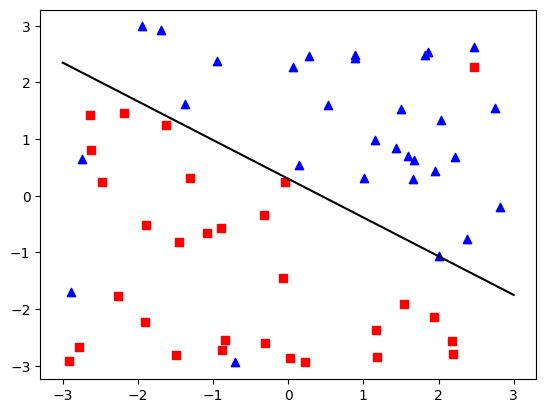

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv("linear.csv")
data_x = np.array(data[["x_1", "x_2"]])
data_y = np.array(data["y"])

model = SVC(kernel = "linear")
model.fit(data_x, data_y)

plt.scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], c = "b", marker = "^")
plt.scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], c = "r", marker = "s")
d = (-3 + 0.1 * 54 - 0.05, -3 + 0.1 * 13 - 0.05)
plt.plot((-3, 3), d, c = "black")

In [40]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
matrix = np.array([[model.predict([(b, a)])[0] for b in x] for a in y])
k = 0
'''for i in range(len(x)):
    if matrix[i][len(x) - 1] == 1:
        print(i)
        break'''
w = [54, 13]


13


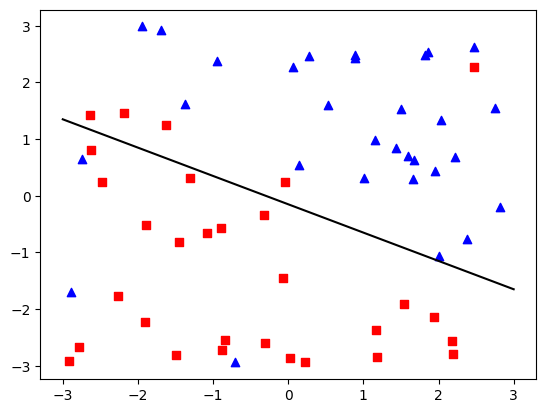

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv("linear.csv")
data_x = np.array(data[["x_1", "x_2"]])
data_y = np.array(data["y"])

model = SVC(kernel = "linear", C = 0.01)
model.fit(data_x, data_y)

plt.scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], c = "b", marker = "^")
plt.scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], c = "r", marker = "s")

w = [-1, -1]
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
matrix = np.array([[model.predict([(b, a)])[0] for b in x] for a in y])
i = 0
while w[0] == -1 or w[1] == -1:
    if matrix[i][0] == 1 and w[0] == -1:
        w[0] = i
    if matrix[i][len(x) - 1] == 1 and w[1] == -1:
        w[1] = i
    i += 1
d = (-3 + 0.1 * w[0] - 0.05, -3 + 0.1 * w[1] - 0.05)
plt.plot((-3, 3), d, c = "black")

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.DataFrame({
    'x1': [0,-1,0,0,1,-1,1],
    'x2': [0,0,-1,1,0,1,-1],
    'y': [0,0,0,1,1,1,1]
})
data_x = np.array(data[["x1", "x2"]])
data_y = np.array(data["y"])

distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))
simul = lambda x: np.e**(- x ** 2)

col = ["sim" + str(i) for i in range(1, 8)]
p = np.round(np.array([simul(distance(x1, x2)) for x1 in data_x for x2 in data_x]), 3)
data1 = pd.DataFrame(p.reshape((7, 7)), columns = col)
data = data.drop(columns = ["y"]).join(data1)
print(data)

   x1  x2   sim1   sim2   sim3   sim4   sim5   sim6   sim7
0   0   0  1.000  0.368  0.368  0.368  0.368  0.135  0.135
1  -1   0  0.368  1.000  0.135  0.135  0.018  0.368  0.007
2   0  -1  0.368  0.135  1.000  0.018  0.135  0.007  0.368
3   0   1  0.368  0.135  0.018  1.000  0.135  0.368  0.007
4   1   0  0.368  0.018  0.135  0.135  1.000  0.007  0.368
5  -1   1  0.135  0.368  0.007  0.368  0.007  1.000  0.000
6   1  -1  0.135  0.007  0.368  0.007  0.368  0.000  1.000


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv("one_circle.csv")
data_x = np.array(data[["x_1", "x_2"]])
data_y = data["y"]

model = SVC(kernel = "poly", degree = 2)
model.fit(data_x, data_y)

SVC(degree=2, kernel='poly')

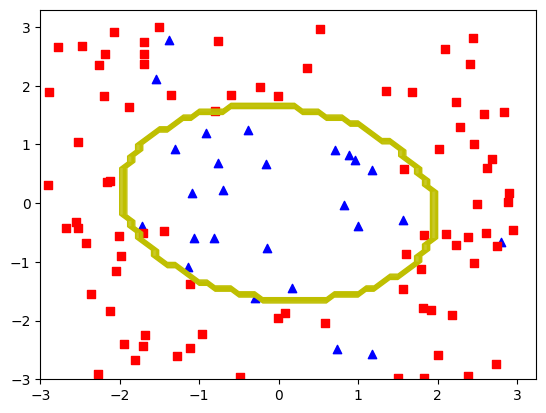

In [150]:
plt.scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], c = "b", marker = "^")
plt.scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], c = "r", marker = "s")

p = np.arange(-3, 3, 0.1)
matrix = np.array([model.predict([[x, y]])[0] for x in p for y in p]).reshape((60, 60))
plt.contour(p, p, matrix, colors = 'y', linewidths = 1)

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv("two_circles.csv")
data_x = np.array(data[["x_1", "x_2"]])
data_y = data["y"]

model = SVC(kernel = "rbf", gamma = 1)
model.fit(data_x, data_y)

SVC(gamma=1)

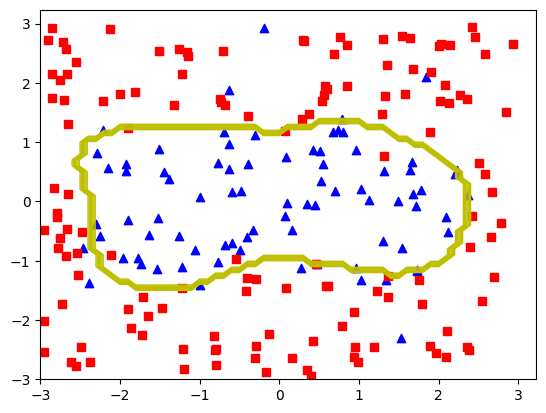

In [179]:
plt.scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], c = "b", marker = "^")
plt.scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], c = "r", marker = "s")

p = np.arange(-3, 3, 0.1)
matrix = np.array([model.predict([[x, y]])[0] for x in p for y in p]).reshape((60, 60)).T
plt.contour(p, p, matrix, colors = 'y', linewidths = 1)

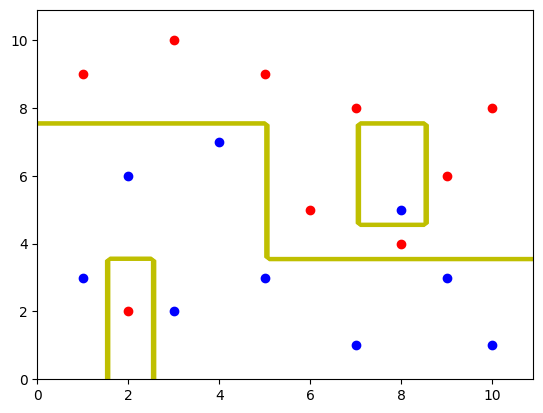

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
data_x = np.array(spam_dataset[['Lottery', 'Sale']])
data_y = np.array(spam_dataset['Spam'])

plt.scatter(data_x[data_y == 0, 0], data_x[data_y == 0, 1], c = "b")
plt.scatter(data_x[data_y == 1, 0], data_x[data_y == 1, 1], c = "r")

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(data_x, data_y)
tree.score(data_x, data_y)

p = np.arange(0, 11, 0.1)
matrix = np.array([tree.predict([[x, y]])[0] for x in p for y in p]).reshape((110, 110)).T
plt.contour(p, p, matrix, colors = 'y', linewidths = 1)

In [45]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x, y = np.meshgrid(x, y)
b = np.c_[x.ravel(), y.ravel()]

array([[[1, 4],
        [2, 4],
        [3, 4]],

       [[1, 5],
        [2, 5],
        [3, 5]],

       [[1, 6],
        [2, 6],
        [3, 6]]])

In [46]:
import pandas as pd
import numpy as np
table = pd.read_csv("titanic.csv", index_col = "PassengerId")
nn = table.isna().sum()
clean_table = table.drop("Cabin", axis = 1)

median = clean_table["Age"].median()
clean_table["Age"] = clean_table["Age"].fillna(median)

clean_table["Embarked"] = clean_table["Embarked"].fillna('U')
clean_table.to_csv('./ctitanic_data.csv', index = None)

In [47]:
gender = pd.get_dummies(clean_table["Sex"], prefix = "Sex", dtype = "int8")
clas = pd.get_dummies(clean_table["Pclass"], prefix = "Pclass", dtype = "int8")
embarked = pd.get_dummies(clean_table["Embarked"], prefix = "Embarked", dtype = "int8")

new_table = pd.DataFrame(clean_table)

new_table = pd.concat([new_table, embarked], axis = 1)
new_table = pd.concat([new_table, gender], axis = 1)
new_table = pd.concat([new_table, clas], axis = 1)

new_table = new_table.drop(["Sex", "Pclass", "Embarked"], axis = 1)

bins = np.arange(0, 90, 10)
c_age = pd.cut(new_table['Age'], bins)
c_age = pd.get_dummies(c_age, prefix = "age", dtype = "int8")
new_table = pd.concat([new_table, c_age], axis = 1)
#new_table = new_table.drop("Age", axis = 1)
#new_table = pd.concat([new_table, c_age], axis = 1)
new_table = new_table.drop(["Age"], axis = 1)

new_table = new_table.drop(["Ticket", "Name"], axis = 1)

new_table.to_csv('./new_titanic_data.csv', index = None)

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("new_titanic_data.csv")
features = data.drop(["Survived"], axis = 1)
labels = data["Survived"]

# remark: we fix random_state the end, to make sure we always get the same split
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(
    features, labels, test_size=0.4, random_state=100)

features_validation, features_test, labels_validation, labels_test = train_test_split(
    features_validation_test, labels_validation_test, test_size=0.5, random_state=100)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

lr_model = LogisticRegression()
lr_model.fit(features_train, labels_train)
dt_model = DecisionTreeClassifier()
dt_model.fit(features_train, labels_train)
nb_model = GaussianNB()
nb_model.fit(features_train, labels_train)
svm_model = SVC()
svm_model.fit(features_train, labels_train)
rf_model = RandomForestClassifier()
rf_model.fit(features_train, labels_train)
ab_model = AdaBoostClassifier()
ab_model.fit(features_train, labels_train)
gr_model = GradientBoostingClassifier()
gr_model.fit(features_train, labels_train)

print("Predictions:")
print("linean regression", lr_model.score(features_validation, labels_validation))
print("tree", dt_model.score(features_validation, labels_validation))
print("nb", nb_model.score(features_validation, labels_validation))
print("svc", svm_model.score(features_validation, labels_validation))
print("forest", rf_model.score(features_validation, labels_validation))
print("adab", ab_model.score(features_validation, labels_validation))
print("grboost", gr_model.score(features_validation, labels_validation))


from sklearn.metrics import f1_score
print('\n', gr_model.score(features_test, labels_test))
score = gr_model.predict(features_test)
f1_score(labels_test, score)

C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predictions:
linean regression 0.7696629213483146
tree 0.7865168539325843
nb 0.7471910112359551
svc 0.6797752808988764
forest 0.7584269662921348
adab 0.7359550561797753
grboost 0.8146067415730337

 0.8324022346368715


0.8026315789473685

In [70]:
from math import *
x = [32769, -31, 244, 3126, 33, 161052, 1889569]
print(*[sqrt(i - 1) for i in x])

NameError: name 'cqrt' is not defined